<a href="https://colab.research.google.com/github/missattack/RentabilidadeAcoes/blob/main/10AcoesRentaveis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [143]:
!pip install yfinance
!pip install investpy
import yfinance as yf
import investpy as inv
import matplotlib.pylab as plt
import numpy as np 
import pandas as pd 
import datetime
from dateutil.relativedelta import *
import requests
import io

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [144]:
#pega todas ações
acoes_br = inv.stocks.get_stocks(country="brazil")
acoes_br

,country,name,full_name,isin,currency,symbol
0,brazil,ABC BRASIL PN,Banco ABC Brasil SA,BRABCBACNPR4,BRL,ABCB4
1,brazil,BRASILAGRO ON,BrasilAgro - Co ON NM,BRAGROACNOR7,BRL,AGRO3
2,brazil,RUMO ON NM,RUMO Logistica Operadora Multimodal SA,BRRAILACNOR9,BRL,RAIL3
3,brazil,ALPARGATAS ON,Alpargatas SA,BRALPAACNOR0,BRL,ALPA3
4,brazil,ALPARGATAS PN,Alpargatas SA,BRALPAACNPR7,BRL,ALPA4
...,...,...,...,...,...,...
744,brazil,Integral Brei Reit,Fdo Inv Imob Fof Integral Brei Reit,BRIBFFCTF007,BRL,IBFF11
745,brazil,Vbi Cri,Fi Imobiliario Vbi Cri,BRCVBICTF001,BRL,CVBI11
746,brazil,Hedge Realty,Hedge Realty Devl Fdo Inv Imob Etf,BRHRDFCTF000,BRL,HRDF11
747,brazil,Rb Cap,Rb Cap Desenvolvimento Res Iii Fii,BRRSPDCTF006,BRL,RSPD11


In [145]:
#mostra os símbolos das ações 
acoes_br['symbol']

0       ABCB4
1       AGRO3
2       RAIL3
3       ALPA3
4       ALPA4
        ...  
744    IBFF11
745    CVBI11
746    HRDF11
747    RSPD11
748    TCPF11
Name: symbol, Length: 749, dtype: object

In [146]:
carteiras_br = []
#itera simbolos e adiciona "sa" ao final, por serem do brasil - somente ativos que tiverem tamanho 5
for x in acoes_br['symbol']:
  if len(x) <= 5:
    # adiciona ".sa"
    carteiras_br.append(x+'.SA')


In [147]:
# mesma iteração anterior, porém com uso de list comprehension conditional:
carteiras_br = []
carteiras_br = [x + ''.join('.SA')  for x in acoes_br['symbol'] if len(x) <= 5]
print(carteiras_br)

['ABCB4.SA', 'AGRO3.SA', 'RAIL3.SA', 'ALPA3.SA', 'ALPA4.SA', 'ALSO3.SA', 'AMAR3.SA', 'ABEV3.SA', 'ADHM3.SA', 'ARZZ3.SA', 'BBAS3.SA', 'BBDC3.SA', 'BBDC4.SA', 'BBRK3.SA', 'BEEF3.SA', 'BPHA3.SA', 'BPAN4.SA', 'BRAP3.SA', 'BRAP4.SA', 'BRFS3.SA', 'APER3.SA', 'BRKM3.SA', 'BRKM5.SA', 'BRML3.SA', 'BRPR3.SA', 'BRSR6.SA', 'OIBR3.SA', 'OIBR4.SA', 'BTOW3.SA', 'B3SA3.SA', 'CAMB4.SA', 'CARD3.SA', 'CCPR3.SA', 'CCRO3.SA', 'CEDO4.SA', 'CEED3.SA', 'CESP6.SA', 'CGAS5.SA', 'CGRA4.SA', 'CIEL3.SA', 'CMIG3.SA', 'CMIG4.SA', 'COCE5.SA', 'CPFE3.SA', 'CPLE3.SA', 'CPLE6.SA', 'CRDE3.SA', 'CSAN3.SA', 'CSMG3.SA', 'CSNA3.SA', 'LIQO3.SA', 'CTNM4.SA', 'CYRE3.SA', 'DASA3.SA', 'DIRR3.SA', 'DTEX3.SA', 'ECOR3.SA', 'EEEL3.SA', 'ELEK4.SA', 'ELET3.SA', 'ELET6.SA', 'EMBR3.SA', 'ENBR3.SA', 'ENGI4.SA', 'EQTL3.SA', 'YDUQ3.SA', 'ETER3.SA', 'EUCA4.SA', 'EVEN3.SA', 'EZTC3.SA', 'FESA4.SA', 'FHER3.SA', 'TASA4.SA', 'FLRY3.SA', 'FRIO3.SA', 'TIET3.SA', 'TIET4.SA', 'GFSA3.SA', 'GGBR3.SA', 'GGBR4.SA', 'GOAU3.SA', 'GOAU4.SA', 'GOLL4.SA', 'GR

In [148]:
data_fim = datetime.datetime.now().date()
data_inicio = datetime.datetime.now() + relativedelta(months=-4)
df_dados = yf.download(carteiras_br,start=data_inicio, end=data_fim)['Adj Close']

[*********************100%***********************]  389 of 389 completed

72 Failed downloads:
- TIET4.SA: No timezone found, symbol may be delisted
- TOYB4.SA: No timezone found, symbol may be delisted
- CCXC3.SA: No timezone found, symbol may be delisted
- OMGE3.SA: No timezone found, symbol may be delisted
- CELP3.SA: No timezone found, symbol may be delisted
- BKBR3.SA: No timezone found, symbol may be delisted
- TRPN3.SA: No timezone found, symbol may be delisted
- CELP7.SA: No timezone found, symbol may be delisted
- JBDU4.SA: No timezone found, symbol may be delisted
- MEND5.SA: No timezone found, symbol may be delisted
- IDVL9.SA: No timezone found, symbol may be delisted
- IDVL3.SA: No timezone found, symbol may be delisted
- JPSA3.SA: No timezone found, symbol may be delisted
- NATU3.SA: No timezone found, symbol may be delisted
- LIQO3.SA: No timezone found, symbol may be delisted
- CCPR3.SA: No timezone found, symbol may be delisted
- JBDU1.SA: No timezone found, symbol may

In [149]:
df_dados.head()


,AALR3.SA,ABCB4.SA,ABEV3.SA,ADHM3.SA,AFLT3.SA,AGRO3.SA,AHEB3.SA,ALPA3.SA,ALPA4.SA,ALSO3.SA,...,VSPT3.SA,VULC3.SA,VVAR3.SA,WEGE3.SA,WHRL3.SA,WHRL4.SA,WIZS3.SA,WLMM3.SA,WLMM4.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2022-10-28,21.139999,19.937189,14.980672,1.56,9.10,29.410000,20.0,16.639999,20.139999,20.790001,...,1.5,12.907378,NaN,38.194748,4.863411,5.115897,7.72,22.217587,25.825666,15.300000
2022-10-31,21.190001,20.270784,15.199160,1.56,9.33,30.059999,20.0,17.250000,21.959999,21.730000,...,1.5,13.529889,NaN,39.991798,4.844112,5.115897,7.79,22.217587,25.431379,16.129999
2022-11-01,21.170000,21.242132,14.999671,1.56,9.31,30.900000,20.0,16.900000,21.780001,21.830000,...,1.5,13.938412,NaN,39.128025,4.902009,5.308587,7.92,22.217587,25.618666,16.440001
2022-11-03,21.219999,21.104771,15.218159,1.56,9.70,31.350000,20.0,17.280001,22.320000,22.250000,...,1.5,14.667917,NaN,39.912373,4.873061,5.347125,7.95,22.217587,24.435812,16.070000
2022-11-04,20.990000,21.399118,15.626637,1.56,9.70,31.290001,20.0,15.920000,18.889999,22.389999,...,1.5,14.580376,NaN,40.508080,4.988856,5.385663,7.99,22.217587,24.465382,16.350000


In [150]:
df_dados.dropna()

# utiliza função pronta do python para o retorno da variação percentual no periodo
retorno = df_dados.pct_change()
retorno


,AALR3.SA,ABCB4.SA,ABEV3.SA,ADHM3.SA,AFLT3.SA,AGRO3.SA,AHEB3.SA,ALPA3.SA,ALPA4.SA,ALSO3.SA,...,VSPT3.SA,VULC3.SA,VVAR3.SA,WEGE3.SA,WHRL3.SA,WHRL4.SA,WIZS3.SA,WLMM3.SA,WLMM4.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2022-10-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-10-31,0.002365,0.016732,0.014585,0.0,0.025275,0.022101,0.0,0.036659,0.090367,0.045214,...,0.0,0.048229,NaN,0.047050,-0.003968,0.000000,0.009067,0.000000,-0.015267,0.054248
2022-11-01,-0.000944,0.047919,-0.013125,0.0,-0.002144,0.027944,0.0,-0.020290,-0.008197,0.004602,...,0.0,0.030194,NaN,-0.021599,0.011952,0.037665,0.016688,0.000000,0.007364,0.019219
2022-11-03,0.002362,-0.006466,0.014566,0.0,0.041890,0.014563,0.0,0.022485,0.024793,0.019240,...,0.0,0.052338,NaN,0.020046,-0.005905,0.007260,0.003788,0.000000,-0.046172,-0.022506
2022-11-04,-0.010839,0.013947,0.026841,0.0,0.000000,-0.001914,0.0,-0.078704,-0.153674,0.006292,...,0.0,-0.005968,NaN,0.014925,0.023762,0.007207,0.005031,0.000000,0.001210,0.017424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-17,0.007623,-0.005414,0.009174,0.0,0.023307,-0.000754,0.0,0.019076,0.020958,0.011249,...,0.0,0.032977,NaN,0.021661,0.000000,-0.010373,-0.011561,0.000000,-0.013305,-0.031026
2023-02-22,-0.005785,-0.016331,0.000758,0.0,-0.014100,-0.008683,0.0,-0.041379,-0.039101,-0.013904,...,0.0,-0.052632,NaN,-0.025225,0.015521,0.014675,0.008772,0.000000,0.043932,-0.052956
2023-02-23,-0.004476,-0.003320,0.003028,0.0,-0.009901,-0.000381,0.0,0.023638,0.008138,0.000000,...,0.0,0.006375,NaN,0.021875,0.000000,-0.002066,-0.005797,0.000000,0.000000,0.000000


In [151]:
# calcula o retorno de múltiplos periodos, a partir do produtório
df = ((retorno + 1).prod() - 1)*100
df.to_dict()


{'AALR3.SA': -3.0747381139876406,
 'ABCB4.SA': -9.96724427425334,
 'ABEV3.SA': -10.55141102137066,
 'ADHM3.SA': 0.0,
 'AFLT3.SA': -1.0989052448102554,
 'AGRO3.SA': -10.744644215597232,
 'AHEB3.SA': -1.1102230246251565e-14,
 'ALPA3.SA': -42.12740103565367,
 'ALPA4.SA': -51.837139507309324,
 'ALSO3.SA': -15.536321824654653,
 'ALUP3.SA': -0.21505868122019267,
 'ALUP4.SA': 4.3189408068168955,
 'AMAR3.SA': -66.83416969532144,
 'ANIM3.SA': -45.380877732771495,
 'APER3.SA': 2.044613948731411,
 'ARZZ3.SA': -23.191959158224396,
 'ATOM3.SA': -2.8112422881405585,
 'AZEV3.SA': -25.961537579812877,
 'AZEV4.SA': -21.49999737739574,
 'AZUL4.SA': -50.03376174408673,
 'B3SA3.SA': -24.762828513984424,
 'BAHI3.SA': -15.829527164076785,
 'BALM3.SA': -6.352422254313828,
 'BALM4.SA': -4.382497040488175,
 'BAUH4.SA': 3.916851300788049,
 'BAZA3.SA': 23.23593382550584,
 'BBAS3.SA': 6.508018975532326,
 'BBDC3.SA': -24.052076257409606,
 'BBDC4.SA': -28.777113030067103,
 'BBRK3.SA': 0.0,
 'BBSE3.SA': 23.283905028

In [152]:
# ordena o dicionário por valor decrescente
sortedByVal = {k: v for k, v in sorted(df.items(), key = lambda v: v[1],reverse=True)[1:10]}
print(sortedByVal)

{'BMKS3.SA': 55.101193941914396, 'LUPA3.SA': 54.069770423704334, 'CSNA3.SA': 52.97252033312931, 'CSRN3.SA': 44.38831876305835, 'EUCA4.SA': 42.79314026489436, 'ODPV3.SA': 35.19323062866195, 'GEPA3.SA': 34.201118278468456, 'LEVE3.SA': 32.385841285356534, 'CRIV3.SA': 29.1139200776265}


In [163]:
# 10 retornos mais rentáveis 
df_grafico = pd.DataFrame.from_dict(sortedByVal, orient='index', columns=['rentabilidade'])
df_grafico


,rentabilidade
BMKS3.SA,55.101194
LUPA3.SA,54.069770
CSNA3.SA,52.972520
CSRN3.SA,44.388319
EUCA4.SA,42.793140
ODPV3.SA,35.193231
GEPA3.SA,34.201118
LEVE3.SA,32.385841
CRIV3.SA,29.113920


<BarContainer object of 9 artists>

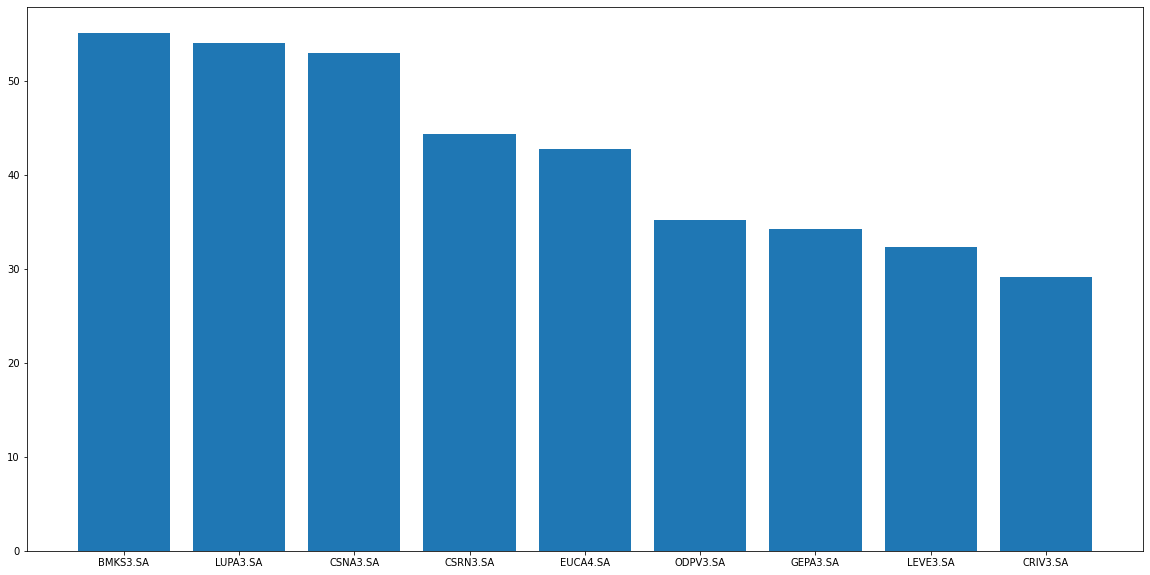

In [166]:
fig = plt.figure(figsize=(20,10))
plt.bar(df_grafico.index, df_grafico['rentabilidade'])